In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle   # imported but not used in this script

In [ ]:
# Step 1: Create synthetic data
T = 100
x_axis = np.linspace(0, 2*np.pi, T)   # 100 evenly spaced points between 0 and 2π
y_axis = np.sin(x_axis)               # sine function values at those points


In [ ]:
# Step 2: Sample training data
N = 30
idx = np.random.choice(T, size=N, replace=False)  # randomly choose 30 indices
Xtrain = x_axis[idx].reshape(N, 1)                # training inputs (reshaped to column vector)
Ytrain = y_axis[idx]                              # training outputs


score for 1 tree: 0.9679794875325008


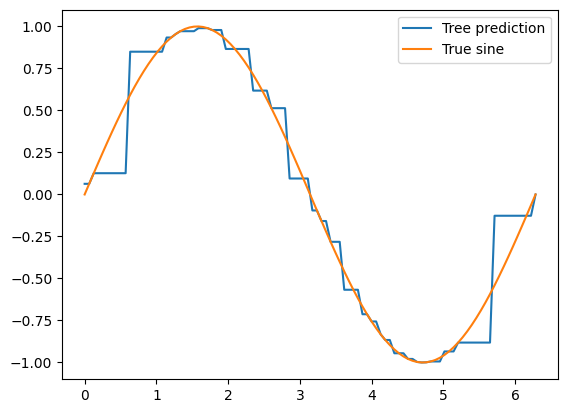

In [ ]:
# Step 3: Train a single decision tree regressor
model = DecisionTreeRegressor()                   # create a regression tree
model.fit(Xtrain, Ytrain)                         # fit tree on training data
prediction = model.predict(x_axis.reshape(T, 1))  # predict on full x-axis
print("score for 1 tree:", model.score(x_axis.reshape(T, 1), y_axis))
# score() returns R^2 coefficient of determination

# Plot predictions vs true sine curve
plt.plot(x_axis, prediction, label="Tree prediction")
plt.plot(x_axis, y_axis, label="True sine")
plt.legend()
plt.show()

In [ ]:
# Step 4: Define Bagging (Bootstrap Aggregating) with Trees
class BaggedTreeRegressor:
  def __init__(self, B):
    self.B = B   # number of bootstrap samples / trees

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      # sample with replacement to create bootstrap dataset
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      # train a decision tree on bootstrap sample
      model = DecisionTreeRegressor()
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    # average predictions from all trees
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return predictions / self.B

  def score(self, X, Y):
    # custom R^2 score implementation
    d1 = Y - self.predict(X)          # residuals
    d2 = Y - Y.mean()                 # deviation from mean
    return 1 - d1.dot(d1) / d2.dot(d2)


score for bagged tree: 0.9817647636990886


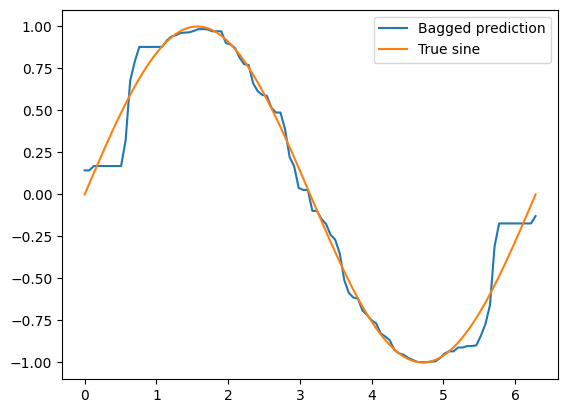

In [ ]:
# Step 5: Train Bagged Trees
model = BaggedTreeRegressor(200)                      # ensemble of 200 trees
model.fit(Xtrain, Ytrain)
print("score for bagged tree:", model.score(x_axis.reshape(T, 1), y_axis))
prediction = model.predict(x_axis.reshape(T, 1))

# Plot bagged predictions vs true sine curve
plt.plot(x_axis, prediction, label="Bagged prediction")
plt.plot(x_axis, y_axis, label="True sine")
plt.legend()
plt.show()